In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def FloodFill(img):
  h,w = img.shape
  vis = np.zeros(img.shape)
  prev = 1
  for i in range(h):
    for j in range(w):
      if(img[i][j] > 0):
        vis[i][j] = prev
  # comp = vis == prev_vis
        if(j > 0):
          if(vis[i][j-1] != 0):
            vis[i][j] = min(prev,vis[i][j-1])
        if(i>0):
          if(vis[i-1][j] != 0):
            vis[i][j] = min(vis[i-1][j], vis[i][j])
        if(vis[i][j] == prev):
          prev+=1
  # prev_vis = np.copy(vis)
  # comp = vis == prev_vis
  equal_arrays = False
  while equal_arrays == False:
    prev_vis = np.copy(vis)
    for i in range(h):
      for j in range(w):
        if(i>0):
          if(vis[i-1][j]>0):
            vis[i][j] = min(vis[i-1][j], vis[i][j])
        if(j>0):
          if(vis[i][j-1] > 0):
            vis[i][j] = min(vis[i][j-1], vis[i][j])
        if(i < h-1):
          if(vis[i+1][j]>0):
            vis[i][j] = min(vis[i+1][j], vis[i][j])
        if(j < w-1):
          if(vis[i][j+1]>0):
            vis[i][j] = min(vis[i][j+1], vis[i][j])
      comp = vis == prev_vis
      equal_arrays = comp.all()
  return vis.astype(np.uint8)

In [4]:
img = cv2.imread('iiit-test-image1.png', 0)
conn_comp = FloodFill(img)
tmax = np.amax(conn_comp)

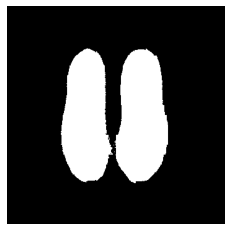

In [10]:
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

In [7]:
ans = []
for i in range(1, tmax+1):
    minx , miny = img.shape
    maxx, maxy = 0,0
    for j in range(len(conn_comp)):
        for k in range(len(conn_comp[0])):
            if conn_comp[j][k] == i:
                if minx > j:
                    minx = j
                if miny > k:
                    miny = k
                if maxx < j:
                    maxx = j
                if maxy < k:
                    maxy = k
    h = maxx-minx+1
    w = maxy-miny+1
    if h > 5 and w > 5:
      ans.append([(maxx+minx)//2, (maxy+miny)//2, h, w])
print(ans)

[[176, 128, 217, 84], [177, 216, 217, 87]]
